<h1>
<center>CFRM 421/521, Spring 2022</center>
</h1>

<h1>
<center>Daniel Eduardo Oliver</center>
</h1>

<h1>
<center>Homework 2</center>
</h1>

* **Due: Monday, May 2, 2022, 11:59 PM**


* Total marks: 41


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as one Jupyter notebook on Canvas and one PDF file on Gradescope.** The notebook must be already run, that is, make sure that you have run all your code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Random forest for time series data [13 marks]

In this question you will work with the NYSE dataset. Only 3 time series in this dataset will be use: `DJ_return` ($a_t$), `log_volatility` ($b_t$), and `log_volume` ($c_t$). Download the data as a csv file from [Canvas](https://canvas.uw.edu/files/91091313/download?download_frd=1). The data was originally obtained from the R library ISLR2, and you can read the documentation for the dataset [here](https://cran.rstudio.com/web/packages/ISLR2/ISLR2.pdf), which explains the meaning of the variables.

You want to predict the 1-step ahead value of `log_volume` $c_{t+1}$ using the previous values of this variable and the other two variables (`DJ_return` and `log_volatility`) up to 5 lags. So the features are $c_{t},\dots,c_{t-4},b_{t},\dots,b_{t-4},a_{t},\dots,a_{t-4}$.

If the data is stored in a file named `NYSE.csv` in your working directory, then loading the data can be done using the code below.

In [7]:
import os
import pandas as pd
os.chdir('C:/Users/olive/OneDrive/Documents/AA UW CLASSES/A A A Spring 2022 Classes/CFRM 521/Assignments/HW2')
data = pd.read_csv("NYSE.csv")

In [8]:
data.head()

,date,day_of_week,DJ_return,log_volume,log_volatility,train
0,1962-12-03,mon,-0.004461,0.032573,-13.127403,True
1,1962-12-04,tues,0.007813,0.346202,-11.749305,True
2,1962-12-05,wed,0.003845,0.525306,-11.665609,True
3,1962-12-06,thur,-0.003462,0.210182,-11.626772,True
4,1962-12-07,fri,0.000568,0.044187,-11.728130,True


In [9]:
new_data = data.drop(['date','day_of_week','train'], axis=1)
new_data.head()

,DJ_return,log_volume,log_volatility
0,-0.004461,0.032573,-13.127403
1,0.007813,0.346202,-11.749305
2,0.003845,0.525306,-11.665609
3,-0.003462,0.210182,-11.626772
4,0.000568,0.044187,-11.728130


## (a) [3 marks]

Create the feature matrix `X` and the target variable `y`. Print at least the first 2 rows of `X` and `y` (it is acceptable that not every element of the rows are printed).

In [10]:

# from pandas import DataFrame
# from pandas import concat
 
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
# #     
# #     Frame a time series as a supervised learning dataset.
# #     Arguments:
# #         data: Sequence of observations as a list or NumPy array.
# #         n_in: Number of lag observations as input (X).
# #         n_out: Number of observations as output (y).
# #         dropnan: Boolean whether or not to drop rows with NaN values.
# #     Returns:
# #         Pandas DataFrame of series framed for supervised learning.
# #     
#     n_vars = 1 if type(data) is list else data.shape[1]
#     df = DataFrame(data)
#     cols, names = list(), list()
#     # input sequence (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(df.shift(i))
#         names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
#     # forecast sequence (t, t+1, ... t+n)
#     for i in range(0, n_out):
#         cols.append(df.shift(-i))
#         if i == 0:
#             names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
#         else:
#             names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
#     # put it all together
#     agg = concat(cols, axis=1)
#     agg.columns = names
#     # drop rows with NaN values
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg

In [11]:
# d = series_to_supervised(new_data.iloc[:,[0]],4)
# # new_data.iloc[:,[1]]
# d.head()

In [12]:


# X = data[['DJ_return','log_volume','log_volatility']]

# y = data[['log_volume']]
# print(y.head(2))
# print(X.head(2))

import matplotlib.pyplot as plt
import numpy as np


In [13]:
def ts_split(ts, feature_steps=5, target_steps = 1):
    n_obs = len(ts) - feature_steps - target_steps + 1
    X = np.array([np.array(ts[idx:idx + feature_steps]).ravel('F') for idx in range(n_obs)])
    y = np.array([ts.iloc[idx + feature_steps:idx + feature_steps + target_steps,1] #added .iloc[..:..,1] which grabs only the 2 column values
                 for idx in range(n_obs)])
    return X,y

X,y = ts_split(new_data, feature_steps=5, target_steps=1)





In [9]:
# n = np.array(new_data[1:6])
# print(n.ravel('F')[0:5])
# print(n)

In [10]:
# print(X[0:,:,1]) #this grabs just the middle column of the of the first row of the data, confusing but data has 3 dimensions
# print(X[0])
# # X[[0]].shape

In [11]:
# new_data["log_volume"].head(7) #checked for each variable and it looks like each time series column was successfully brought into X

In [12]:
y[1] #it works!!
# new_data.iloc[0+5:0+5+1,1]

print("First two rows of X matrix (15 features per row):")
print(X[0:2])
print("\nFirst two rows of y vector:")
print(y[0:2])

First two rows of X matrix (15 features per row):
[[-4.46100000e-03  7.81300000e-03  3.84500000e-03 -3.46200000e-03
   5.68000000e-04  3.25730000e-02  3.46202000e-01  5.25306000e-01
   2.10182000e-01  4.41870000e-02 -1.31274026e+01 -1.17493047e+01
  -1.16656090e+01 -1.16267724e+01 -1.17281302e+01]
 [ 7.81300000e-03  3.84500000e-03 -3.46200000e-03  5.68000000e-04
  -1.08240000e-02  3.46202000e-01  5.25306000e-01  2.10182000e-01
   4.41870000e-02  1.33246000e-01 -1.17493047e+01 -1.16656090e+01
  -1.16267724e+01 -1.17281302e+01 -1.08725263e+01]]

First two rows of y vector:
[[ 0.133246]
 [-0.011528]]


## (b)  [4 marks]

Consider fitting a random forest to predict the 1-step ahead value of `log_volume`. The random forest must include the argument `random_state=42`, and it is useful to also include `n_jobs=-1` (you can use `n_job=-1` throughout this homework wherever it is avaliable). Use 3-fold time series CV, with the test set split 50% into a validation set and 50% into the actual test set, to tune the hyperparameters `n_estimators` taking the values  100, 500, 750, and the cost-complexity pruning parameter $\alpha$ taking the values $10^{-k}$, $k=0,1,\dots,9$. The performance measure is RMSE. Report the best hyperparameters.

**[Add your solution here]**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

tscv = TimeSeriesSplit(n_splits=3)
series_len = new_data.size #is necessary for the plotting.

#Hyperparameter combinations
n_estimators_list = [100,500,750]
ccp_alpha_list = [10**-0,10**-1,10**-2,10**-3,10**-4,10**-5,10**-6,10**-7,10**-8,10**-9] #cost-complexity pruning parameter alpha

#code variation based on code in lecture 4 pg 99
#we have to write our own code in order to do cross-validation and hyperparameter tuning on time series data
def time_series_valid_test(X,y, n_split, valid_or_test,optimal_par=None):
    tscv = TimeSeriesSplit(n_splits=n_split)
    rf_rmse = []
    i = 0
    for train_index, test_index in tscv.split(X):
        i += 1
        #break the test into 50% validation set and 50% test set
        break_test_ind = int(test_index[0] + 0.5*(test_index[-1]-test_index[0]))
        valid_index = np.array(list(range(test_index[0],break_test_ind)))
        test_index = np.array(list(range(break_test_ind, test_index[-1])))
    
        #Split
        X_train, X_valid, X_test = X[train_index], X[valid_index], X[test_index]
        y_train, y_valid, y_test = y[train_index], y[valid_index], y[test_index]
    
        #tuning
        if valid_or_test == "valid":
            for ccp_alpha in ccp_alpha_list:
                for n_estimators in n_estimators_list:
                    model_rf = RandomForestRegressor(random_state=42, 
                                                     ccp_alpha = ccp_alpha,n_estimators=n_estimators,n_jobs=-1)
                    model_rf.fit(X_train, y_train.ravel())#why do i need the .ravel() here?
                    y_val_rf = model_rf.predict(X_valid)
                    rf_rmse.append(np.sqrt(mean_squared_error(y_valid, y_val_rf)))
                
        # evaluate on test set
        if valid_or_test == "test":
            model_rf = RandomForestRegressor(random_state = 42, 
                                             ccp_alpha = 10**-5 ,n_estimators = 500,n_jobs=-1)#manually put in best hyperparameters
            model_rf.fit(X_train, y_train.ravel())
            y_test_rf = model_rf.predict(X_test)
            rf_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_rf)))
        
            #plot the prediction for the last CV fold
            if i == n_split:
                plt.plot(range(series_len-test_index.size,series_len),
                        y_test_rf, label="1-step ahead prediction") #change this to one step ahead
                plt.plot(range(series_len-test_index.size, series_len),
                        y_test, label="True value")
                plt.legend(loc="upper left")
                
    #average RMSE over CV folds
    if valid_or_test == "valid":
        rf_rmse = np.mean(np.array(rf_rmse).reshape(
            n_split, len(ccp_alpha_list)*len(n_estimators_list)), axis=0) #will this axis=0 be a problem?
        return rf_rmse
    if valid_or_test == "test":
        rf_rmse = np.mean(rf_rmse)
        return rf_rmse, y_test_rf
            


In [14]:
rf_rmse = time_series_valid_test(X, y, 3, "valid") #30 parameter combinations, 3 CVs, take the average across the 3 CVs' parameter combos and out pos 30 babies

In [15]:
#let's determine the best hyperparameters
# print(np.argmin(rf_rmse))
# print(rf_rmse.reshape(10,3))


print("The best hyperparameters are n_estimators=500 and ccp_alpha=10^-5, with an average RMSE of (accross the 3 CV's):")
best_rmse = rf_rmse[16]
print(best_rmse)

The best hyperparameters are n_estimators=500 and ccp_alpha=10^-5, with an average RMSE of (accross the 3 CV's):
0.16042702494617542


In [16]:
# new_data.shape

## (c)  [2 marks]

Using the same time series split as in (b), compute the RMSE of the best fitting model on the test set, and include a plot of the true values and predicted values on the test set of the last fold (the fold closest to the current time) of the CV.

**[Add your solution here]**

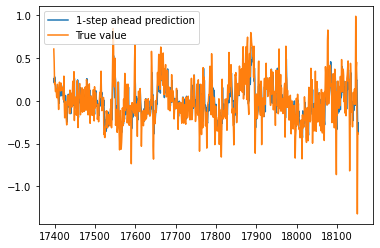

In [17]:
rf_rmse_test, y_test_rf_pred = time_series_valid_test(X, y, 3, "test")

In [18]:
print("The RMSE Value of the best fitting model is:")
print(rf_rmse_test)

The RMSE Value of the best fitting model is:
0.18697418303225452


## (d) [2 marks]

It is often useful to check that your model is not worse than a very simple method of prediction. Compute the RMSE of a model that simply predicts the 1-step ahead value of `log_volume` $c_{t+1}$ as the current value $c_t$, and compare this to the best fitting random forest model.

**[Add your solution here]**

In [19]:
def time_series_test_only(X,y, n_split, valid_or_test,optimal_par=None):
    tscv = TimeSeriesSplit(n_splits=n_split)
    rmse = []
    i = 0
    for train_index, test_index in tscv.split(X):
        i += 1
        #break the test into 50% validation set and 50% test set
        break_test_ind = int(test_index[0] + 0.5*(test_index[-1]-test_index[0]))
        valid_index = np.array(list(range(test_index[0],break_test_ind)))
        test_index = np.array(list(range(break_test_ind, test_index[-1])))
    
        #Split
        X_train, X_valid, X_test = X[train_index], X[valid_index], X[test_index]
        y_train, y_valid, y_test = y[train_index], y[valid_index], y[test_index]
    
        #tuning, HEre WE ARE ONLY WOrRIED ABOUt the tESt Set not thE VALIDAtION Set
#         if valid_or_test == "valid":
#             for ccp_alpha in ccp_alpha_list:
#                 for n_estimators in n_estimators_list:
#                     model_rf = RandomForestRegressor(random_state=42, 
#                                                      ccp_alpha = ccp_alpha,n_estimators=n_estimators,n_jobs=-1)
#                     model_rf.fit(X_train, y_train.ravel())#why do i need the .ravel() here?
#                     y_val_rf = model_rf.predict(X_valid)
#                     rf_rmse.append(np.sqrt(mean_squared_error(y_valid, y_val_rf)))
                
        # evaluate on test set
        if valid_or_test == "test":
#             model_rf = RandomForestRegressor(random_state = 42, 
#                                              ccp_alpha = 10**-5 ,n_estimators = 500,n_jobs=-1)#manually put in best hyperparameters
#             model_rf.fit(X_train, y_train.ravel())
            y_test_pred = X_test #X_test here is exclusively the lagged value
            rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
        
#             #plot the prediction for the last CV fold
#             if i == n_split:
#                 plt.plot(range(series_len-test_index.size,series_len),
#                         y_test_rf, label="1-step ahead prediction") #change this to one step ahead
#                 plt.plot(range(series_len-test_index.size, series_len),
#                         y_test, label="True value")
#                 plt.legend(loc="upper left")
                
    #average RMSE over CV folds
#     if valid_or_test == "valid":
#         rf_rmse = np.mean(np.array(rf_rmse).reshape(
#             n_split, len(ccp_alpha_list)*len(n_estimators_list)), axis=0) #will this axis=0 be a problem?
#         return rf_rmse
    if valid_or_test == "test":
        rmse = np.mean(rmse) #takes the average over the three folds
        return rmse, y_test_pred

In [22]:
# #talked about on pg 505 of the book and borrowed some code from pg 88 of the lecture 4 notes

# split_ind = int(X.shape[0]*0.8)

# X_train_full, y_train_full = X[:split_ind], y[:split_ind]
# X_test, y_test = X[split_ind:], y[split_ind:]

# y_pred = X_train_full[:,5]
previous_lag = X[:,9]




In [23]:
from sklearn.metrics import mean_squared_error
dumb_rmse, dumb_pred = time_series_test_only(previous_lag, y, 3, "test")

In [24]:
print("Here is the resulting RMSE of naive forecasting:")
print(dumb_rmse)

Here is the resulting RMSE of naive forecasting:
0.21692013508591304


## (e) [2 marks]

Compute the feature importances of the best fitting model. Which feature is the most important and what is its feature importance value?

In [25]:
best_model_rf = RandomForestRegressor(random_state = 42,ccp_alpha = 10**-5 ,n_estimators = 500,n_jobs=-1)#manually put in best hyperparameters

best_model_rf.fit(X, y.ravel())


RandomForestRegressor(ccp_alpha=1e-05, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [26]:
# print(np.argmax(best_model_rf.feature_importances_))
# print(best_model_rf.feature_importances_)
print("The most important feature is the log_volatility value c_t (right before c_t+1). The feature importance is:")
print(best_model_rf.feature_importances_[9])

print("All the weights are:")
print(best_model_rf.feature_importances_)

The most important feature is the log_volatility value c_t (right before c_t+1). The feature importance is:
0.5283695245558075
All the weights are:
[0.03375206 0.02975017 0.03719086 0.03905093 0.06408042 0.05909269
 0.06268711 0.04354723 0.03707131 0.52836952 0.01552671 0.0122866
 0.01101817 0.01258909 0.01398713]


**[Add your solution here]**

# 2. SVM classification and regression [11 marks]

## (a) [2 marks]

In this question, a SVM is used for classification for the MNIST dataset. The following code loads the MNIST dataset, creates the test set, and to reduce training time, takes a random sample of 2000 points from the full training set to use as your actual training set stored in `X` and `y`. Do not shuffle the data and do not use a standard scaler.

Hint: Reading the solution to Question 9 in the Chapter 5 [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb) on the textbook website may help with this question.

In [94]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]

In [95]:
from sklearn.model_selection import StratifiedShuffleSplit

N = 2000
split_obj = StratifiedShuffleSplit(n_splits=1,
                               test_size=N/60000, random_state=42)
for other_idx, subsample_idx in split_obj.split(X_train, y_train):
    X = X_train[subsample_idx]
    y = y_train[subsample_idx]

**Task:** Consider fitting the linear SVM classifier (`LinearSVC`) with `max_iter=50000`. For this model, optimize the hyperparameter $C$ using 3-fold CV over the values $10^{-k}$, $k=0,1,\dots,9$, where the performance measure is accuracy. What is the best $C$ and what is the accuracy in this case?

In [96]:
from sklearn.svm import SVC

linear_SVC = SVC(max_iter=50000)
linear_SVC.fit(X,y)

SVC(max_iter=50000)

In [97]:
#here i used randomized search cross-validation
from sklearn.model_selection import RandomizedSearchCV #code based off of code provided in Q9 of chapter 5
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import GridSearchCV

param_distributions = {"C": [10**-0,10**-1,10**-2,10**-3,10**-4,10**-5,10**-6,10**-7,10**-8,10**-9]}
grid_search_cv = GridSearchCV(linear_SVC, param_distributions, cv=3, n_jobs=-1, scoring="accuracy")
grid_search_cv.fit(X,y)

GridSearchCV(cv=3, estimator=SVC(max_iter=50000), n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07,
                               1e-08, 1e-09]},
             scoring='accuracy')

In [98]:
from sklearn.metrics import accuracy_score
y_pred = grid_search_cv.best_estimator_.predict(X)


print("The best C hyperparameter is:")
print(grid_search_cv.best_estimator_)

print("\nWith an accuracy score of:")
print(accuracy_score(y, y_pred))


The best C hyperparameter is:
SVC(C=1, max_iter=50000)

With an accuracy score of:
0.9855


**[Add your solution here]**

## (b) [2 marks]

**Task:** Now consider fitting a SVM with a Gaussian RBF kernel and `max_iter=50000`. For this model, optimize the hyperparameters $C$ over the distrbution `uniform(1,10)` and $\gamma$ over the distribution `reciprocal(0.001, 0.1)` with 10 random samples. Again, use 3-fold CV and the performance measure is accuracy. What are the best hyperparameters and what is the accuracy in this case?

In [99]:
from sklearn.pipeline import Pipeline
import scipy.stats as sc
from scipy.stats import reciprocal
from sklearn.model_selection import cross_val_score

hyperparams = []
avg_score = []
for idx in range(10): #fitting 3 folds for each of 10 random samples! So there are 10 pairs of parameters
    #draws from these distributions
    gamma = sc.reciprocal.rvs(0.001,0.1)
    C = uniform.rvs(1,10)
    hyperparams.append([gamma, C])
    

    kernel_SVC = Pipeline([
        ("svc", SVC(kernel = 'rbf', max_iter=50000, gamma=gamma, C=C))
    ])

    scores = cross_val_score(kernel_SVC, X, y, cv=3, scoring="accuracy", n_jobs=-1)
    avg_score.append(np.mean(scores))


#     param_distributions = {"gamma": reciprocal(0.001,0.1), "C": uniform(1,10)}
#     rnd_search_cv = RandomizedSearchCV(kernel_SVC, param_distributions, n_iter=10, verbose=2, cv=3, n_jobs=-1)
#     rnd_search_cv.fit(X,y)

In [100]:
# gamma1 = sc.reciprocal.rvs(0.001,0.1) #this works!
# print(gamma1)

# C = uniform.rvs(1,10)
# print(C)

best_pair = hyperparams[0]
# print(len(hyperparams[0:])) #ignore the first
print(avg_score)
print("The best hyperparameter pair is [gamma,C]:")
print(best_pair)
print("with an average accuracy of:")
print(avg_score[0])

[0.11250005627816723, 0.11250005627816723, 0.11250005627816723, 0.11250005627816723, 0.11250005627816723, 0.11250005627816723, 0.11250005627816723, 0.11250005627816723, 0.11250005627816723, 0.11250005627816723]
The best hyperparameter pair is [gamma,C]:
[0.001893373197198508, 2.4924422529573533]
with an average accuracy of:
0.11250005627816723


In [101]:

# # for idx, param in enumerate
# # kernel_SVC = Pipeline([
# #     ("svc", SVC(max_iter=50000))
# # ])

# g = reciprocal(0.001,0.1)
# print(g)

In [102]:
type(param_distributions)

dict

**[Add your solution here]**

## (c) [2 mark]

**Task:** Choose the best model in (a) and (b). Then for this model, evaluate the accuracy on the test set, which is stored in `X_test` and `y_test`.

**[Add your solution here]**

In [103]:
#best model in (a)
y_preda = grid_search_cv.best_estimator_.predict(X_test)



In [104]:
print("The best model in (a) has the following accuracy score on the test set:")
print(accuracy_score(y_preda, y_test))


The best model in (a) has the following accuracy score on the test set:
0.94


In [105]:
#best model in (b)

gamma = best_pair[0] 
C = best_pair[1
             ]
kernel_SVC = Pipeline([
    ("svc", SVC(kernel = 'rbf', max_iter=50000, gamma=gamma, C=C))
])

kernel_SVC.fit(X,y)
y_predb = kernel_SVC.predict(X_test)



In [106]:

print("The accuracy score of the best model in (b) on the test set is:")
print(accuracy_score(y_predb, y_test))

The accuracy score of the best model in (b) on the test set is:
0.1135


## (d) [3 marks]

Consider the California housing data from Homework 1 using the same training and test set there. The data is obtained using the code below, which comes from Homework 1, and the training set is stored in `X` and `y`. Do not shuffle the data.

Hint: Reading the solution to Question 10 in the Chapter 5 [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb) on the textbook website may help with this question.

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import os
import tarfile
from six.moves import urllib
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import StratifiedShuffleSplit

HOUSING_PATH = os.path.join("datasets", "housing")

def fetch_housing_data(housing_url, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

HOUSING_URL = ("https://raw.githubusercontent.com/ageron/"+
               "handson-ml2/master/datasets/housing/housing.tgz")
fetch_housing_data(HOUSING_URL)
data = load_housing_data()

data["income_cat"] = np.ceil(data["median_income"] / 1.5)
data["income_cat"].where(data["income_cat"] < 5, 5.0, inplace=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
X_raw = strat_train_set.drop("median_house_value", axis=1)
y = strat_train_set["median_house_value"].copy()

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_features = X_raw.drop("ocean_proximity", axis=1)
num_attribs = list(num_features)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X = full_pipeline.fit_transform(X_raw)
X_test_raw = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test = full_pipeline.transform(X_test_raw)

**Task:** Consider SVM regression with a Gaussian RBF kernel and a sigmoid kernel with `max_iter=50000`. For both models, use randomized search to choose good hyperparameter values for `C` and `gamma`, and set the arguement `random_state=42`. For both models, optimize the hyperparameters $C$ over the distrbution `uniform(1,10)` and $\gamma$ over the distribution `reciprocal(0.001, 0.1)` with 10 random samples. Again, use 3-fold CV and the performance measure is MSE. What are the best hyperparameters and what is the MSE in this case?

In [108]:
from sklearn.svm import SVR # code based off of code in Q10 of chapter 5 jupyter notebook
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(kernel='rbf', max_iter=50000), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42, scoring="neg_mean_squared_error", n_jobs=-1)
rnd_search_cv.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVR(max_iter=50000), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000257D167C790>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000257D1809DC0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [109]:
print("The best hyperparameters are the following:")
print(rnd_search_cv.best_estimator_)
# rnd_search_cv.cv_results_

print("The MSE Score is:")
print(rnd_search_cv.best_score_)
# print(mean_squared_error(ypred,y))

The best hyperparameters are the following:
SVR(C=4.745401188473625, gamma=0.07969454818643928, max_iter=50000)
The MSE Score is:
-13870533538.430756


In [110]:
from sklearn.svm import SVR # code based off of code in Q10 of chapter 5 jupyter notebook
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv2 = RandomizedSearchCV(SVR(kernel='sigmoid', max_iter=50000), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42, scoring="neg_mean_squared_error", n_jobs=-1, return_train_score=True)
rnd_search_cv2.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVR(kernel='sigmoid', max_iter=50000),
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000257D16FD880>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000257D1806A00>},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [111]:
print("The best hyperparameters are the following:")
print(rnd_search_cv2.best_estimator_)
# rnd_search_cv.cv_results_

print("The MSE Score is:")
print(rnd_search_cv2.best_score_)
# print(mean_squared_error(ypred,y))

The best hyperparameters are the following:
SVR(C=4.745401188473625, gamma=0.07969454818643928, kernel='sigmoid',
    max_iter=50000)
The MSE Score is:
-13740348031.432245


**[Add your solution here]**

## (e) [2 marks]

**Task:** Choose the best model in (d). Then for this model, evaluate the RMSE on the test set, which is stored in `X_test` and `y_test`.

**[Add your solution here]**

In [112]:
#the best model fit onto the test set
from sklearn.metrics import mean_squared_error
print("The best model in (d) is the SVM Regression with the sigmoid kernel")
y_prede = rnd_search_cv2.best_estimator_.predict(X_test)

print("The RMSE on the test set is:")
print(np.sqrt(mean_squared_error(y_prede, y_test)))

The best model in (d) is the SVM Regression with the sigmoid kernel
The RMSE on the test set is:
114752.8087714515


# 3. Voting Classifiers [8 marks]
## (a)  [4 marks]

Consider the MNIST dataset. To save computational time, split it into a smaller training set (the first 5000 observations) and a validation set (the next 1000 observations) as given by the following code.

In [113]:
from sklearn.datasets import fetch_openml #code on pg 5 of lecture 4 notes
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)


N = 5000
M = 6000
X_train = mnist["data"][:N]
X_val  = mnist["data"][N:M]
y_train = mnist["target"][:N]
y_val = mnist["target"][N:M]

Do not shuffle the data and do not use a standard scaler. Train the following classifiers on the training set:

(i) a random forest classifier with arguments `n_estimators=100, n_jobs=-1, random_state=42`,

(ii) an extra-trees classifier with arguments `n_estimators=100, n_jobs=-1, random_state=42`,

(iii) an AdaBoost classifier `n_estimators=50, learning_rate=0.2, random_state=42`,

(iv) a gradient boosting classifier using the class `GradientBoostingClassifier()` with arguments `max_depth=2, n_estimators=10, learning_rate=0.25, random_state=42`.

Report the accuracy of each trained classifier on the validation set.

In [114]:
from sklearn.metrics import accuracy_score

**[Add your solution here]**

In [115]:


#(i) Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [116]:
y_pred_rfc = rfc.predict(X_val)
rmse_rfc=np.sqrt(mean_squared_error(y_pred_rfc, y_val))

In [117]:
print("Here is the accuracy score of the Random Forest Classifier on the Validation set:")
print(accuracy_score(y_val, y_pred_rfc))

Here is the accuracy score of the Random Forest Classifier on the Validation set:
0.939


In [118]:
#(ii) Extra-trees classifier
from sklearn.ensemble import ExtraTreesClassifier

xtc = ExtraTreesClassifier(n_estimators = 100, n_jobs=-1, random_state=42)
xtc.fit(X_train, y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [119]:
y_pred_xtc = xtc.predict(X_val)
rmse_xtc=np.sqrt(mean_squared_error(y_pred_xtc, y_val))

In [120]:
print("Here is the accuracy score of the Extra Trees Classifier on the Validation set:")

print(accuracy_score(y_val, y_pred_xtc))

Here is the accuracy score of the Extra Trees Classifier on the Validation set:
0.947


In [121]:
#(iii) AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(n_estimators=50,learning_rate=0.2, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2, random_state=42)

In [122]:
y_pred_ada = ada_clf.predict(X_val)
# rmse_ada=np.sqrt(mean_squared_error(y_pred_ada, y_val))

In [123]:
print("Here is the accuracy score of the AdaBoost Classifier on the Validation set:")

print(accuracy_score(y_val, y_pred_ada))

Here is the accuracy score of the AdaBoost Classifier on the Validation set:
0.736


In [124]:
#(iv) Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier #uses decision trees as the underlying estimators (like the random forest)

gbf = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=0.25, random_state=42)
gbf.fit(X_train,y_train)

y_pred_gbf = gbf.predict(X_val)
rmse_gbf=np.sqrt(mean_squared_error(y_pred_gbf, y_val))

In [125]:
print("Here is the accuracy score of the Gradient Boosting Classifier on the Validation set:")

print(accuracy_score(y_val, y_pred_gbf))

Here is the accuracy score of the Gradient Boosting Classifier on the Validation set:
0.834


## (b)  [4 marks]
Train a hard-voting and a soft-voting ensemble classifier based on the models in (a). Evaluate each voting classifier on the validation set. Comment on whether the performance of the ensemble model is better or worse than the individual models in (a) and why that is the case.

**[Add your solution here]**

In [126]:
#Hard Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', rfc),('ex', xtc),('ada',ada_clf),('gb',gbf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('ex',
                              ExtraTreesClassifier(n_jobs=-1, random_state=42)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.2,
                                                 random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.25,
                                                         max_depth=2,
                                                         n_estimators=10,
                                                         random_state=42))])

In [127]:
y_pred_hv=voting_clf.predict(X_val)
print("Accuracy of Hard Voting Classifier (ensemble classifier) on the validation set:")
print(accuracy_score(y_val, y_pred_hv))

Accuracy of Hard Voting Classifier (ensemble classifier) on the validation set:
0.923


In [128]:
#Soft Voting Classifier

voting_clf = VotingClassifier(estimators=[('rf', rfc),('ex', xtc),('ada',ada_clf),('gb',gbf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('ex',
                              ExtraTreesClassifier(n_jobs=-1, random_state=42)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.2,
                                                 random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.25,
                                                         max_depth=2,
                                                         n_estimators=10,
                                                         random_state=42))],
                 voting='soft')

In [129]:
y_pred_sv=voting_clf.predict(X_val)
print("Accuracy of Soft Voting Classifier (ensemble classifier) on the validation set:")
print(accuracy_score(y_val, y_pred_sv))

Accuracy of Soft Voting Classifier (ensemble classifier) on the validation set:
0.926


In [130]:
print("The highest performer overall was the random forest classifier model, it outperformed all other models.")
print("\nOf the voting classifiers, the hard voting classifier had a higher accuracy than the soft.")
print("\nA reason the voting classifiers didn't outperform the underlying models is because the underlying models")
print("\nare not independent of one another, as they are all trained on the same day. This leads to them having")
print("\nthe same errors as one another, leading to majority votes fort he wrong class, reducing the model's accuracy.")

The highest performer overall was the random forest classifier model, it outperformed all other models.

Of the voting classifiers, the hard voting classifier had a higher accuracy than the soft.

A reason the voting classifiers didn't outperform the underlying models is because the underlying models

are not independent of one another, as they are all trained on the same day. This leads to them having

the same errors as one another, leading to majority votes fort he wrong class, reducing the model's accuracy.


# 4. Stacking [9 marks]

We continue with the setting of Question 3. The training set, validation set and test set are the same. In Question 3, we have used predetermined rules (that is, hard-voting and soft-voting) to build the ensemble prediction. **Stacking** is an ensemble method in which you train a model (called a **blender**) to aggregate the result of each predictor into an ensemble prediction.

Hint: Reading the subsection "Stacking" in Chapter 7 of the textbook and the solution to Question 9 in the Chapter 7 [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb) on the textbook website may help with this question.

## (a)  [3 marks]

For each of the four classifiers in Question 3(a), make 5000 clean predictions on the training set with 3-fold cross validation using `sklearn.model_selection.cross_val_predict()`. You should end up with four predictions per observation. Print at least the first 5 rows of `pred`. Next, apply one-hot encoding to `pred` since these predictions are class labels.

**[Add your solution here]**

In [131]:
from sklearn.datasets import fetch_openml #code on pg 5 of lecture 4 notes
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)


N = 5000
M = 6000
X_train = mnist["data"][:N]
X_val  = mnist["data"][N:M]
y_train = mnist["target"][:N]
y_val = mnist["target"][N:M]

In [132]:
from sklearn.model_selection import cross_val_predict
estimators = voting_clf.estimators_ #these are the estimators from question 3

X_train_predictions = np.empty((len(X_train), len(estimators)), dtype=np.float32) #on the training set, like the problem asked for

for index, estimator in enumerate(estimators):
    X_train_predictions[:, index] = cross_val_predict(estimator, X_train, y_train, cv=3, n_jobs=-1)
    print(index)

0
1
2
3


In [133]:
from sklearn.preprocessing import OneHotEncoder

print("First 5 rows of predictions")
print(X_train_predictions[0:5])

enc = OneHotEncoder()
# enc.fit(X_train_predictions)
# print("The one hot encoder categories")
# print(enc.categories_) 

X_tp = enc.fit_transform(X_train_predictions) #transforms the predictions into one hot encoding predictions

X_tp = X_tp.toarray()
print(X_tp)

First 5 rows of predictions
[[5. 5. 3. 3.]
 [0. 0. 5. 0.]
 [4. 4. 4. 4.]
 [1. 1. 1. 1.]
 [9. 9. 9. 9.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [134]:
X_train.shape
X_train_predictions.shape

(5000, 4)

## (b) [3 marks]
Use the predictions in (a) as features and the actual label of the observations as the target. Train a random forest classifier on the training set with the parameters `n_estimators=100, random_state=42`.  This classifier is a blender. 

In [135]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_tp, y_train)

RandomForestClassifier(random_state=42)

**[Add your solution here]**

## (c) [3 marks]

Obtain the predictions of the blender on the validation set by feeding predictions on the validation set from the four classifiers in Question 3(a) into the blender trained in Question 4(b). Do not retrain the blender. These are called stacking predictions. Report the accuracy of your stacking predictions on the validation set and compare this to the results in Question 3(b).

In [136]:
#idea is from Q9 of ch 7 jupyter notebook
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32) #on the training set, like the problem asked for

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

enc_c = OneHotEncoder()
enc_c.fit(X_val_predictions)
    
X_tval = enc_c.transform(X_val_predictions)

In [137]:
predy4c = rfc.predict(X_tval)

print("The accuracy of the stacking predictions on the validation set.")
accuracy_score(predy4c, y_val)

The accuracy of the stacking predictions on the validation set.


0.947

**[Add your solution here]**